https://people.revoledu.com/kardi/tutorial/Python/Video+Analysis+using+OpenCV-Python.html#:~:text=Video%20Analysis%20using%20OpenCV%2DPython&text=This%20tutorial%20is%20a%20practice,numpy%20and%20math%20modules%20installed.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cap = cv2.VideoCapture('..//assets//videos//juggling.mp4')
vs = cap

In [3]:
w = int(vs.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vs.get(cv2.CAP_PROP_FRAME_HEIGHT))
print('Height and Width of the frame {} {}'.format(h, w))

Height and Width of the frame 2160 3840


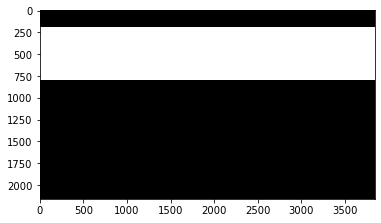

In [4]:
base_mask = np.zeros((h, w))
base_mask[200:800] = 1
plt.imshow(base_mask, cmap = 'gray')
plt.show()

In [5]:
hsv_lower = (0, 48, 0)
hsv_higher = (180, 255, 75)

In [6]:
def processAndShow(vs, func = None):
    
    while vs.isOpened():
        ret, fr = vs.read()
        if ret == False:
            break
        
        if func is not None:
            fr = func(fr)
            
        cv2.imshow('frame', fr)
            
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
#     vs.release()
    cv2.destroyAllWindows()

In [7]:
def proc(fr):

    fr_ = cv2.cvtColor(fr, cv2.COLOR_BGR2GRAY)
    print('--')
#     fr_ = cv2.inRange(fr_, (104, 64, 80), (124, 255, 255))
    
#     fr_ = cv2.erode(fr_, np.ones((25, 25), np.uint8), 35)
# #     fr = cv2.dilate(fr, np.ones((5, 5), np.uint8), 5)
    
#     contours, _ = cv2.findContours(fr_, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#     blobs = 0
#     for i, c in enumerate(contours):
#         contours_poly = cv2.approxPolyDP(c, 3, True)
#         boundRect = cv2.boundingRect(contours_poly)
#         centers, radius = cv2.minEnclosingCircle(contours_poly)
#         area = cv2.contourArea(c)
#         if area > 5000:
#             blobs+=1            
# #             cv2.circle(fr, (int(centers[0]), int(centers[1])), int(radius), [255, 0, 0], 2)
# #         cv2.putText(fr, area, (int(centers[0]), int(centers[1])), cv2.FONT_HERSHEY_SIMPLEX, 2, 255)
#     cv2.putText(fr_, 'Current Boxes {}'.format(blobs), (int(0), int(50)), cv2.FONT_HERSHEY_SIMPLEX, 2, color = [255, 255, 255])
#     fr_ = cv2.resize(fr_, (960, 540), fx = 0.5, fy = 0.5)

    circles = cv2.HoughCircles(fr_, cv2.HOUGH_GRADIENT, 1.2, 100)
#     # ensure at least some circles were found
#     if circles is not None:
#         # convert the (x, y) coordinates and radius of the circles to integers
#         circles = np.round(circles[0, :]).astype("int")
#         # loop over the (x, y) coordinates and radius of the circles
#         for (x, y, r) in circles:
#             print(r)
#             if r < 50:
#                 continue
#             # draw the circle in the output image, then draw a rectangle
#             # corresponding to the center of the circle
#             cv2.circle(fr, (x, y), r, (0, 255, 0), 4)
#             cv2.rectangle(fr, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
#     print(';;;')
    return fr_

In [ ]:
processAndShow(vs, proc)

In [19]:
ret, fr = vs.read()

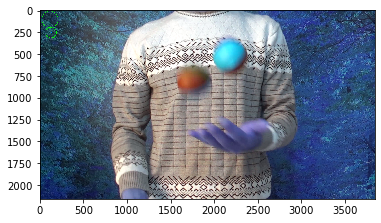

In [20]:
fr_ = cv2.cvtColor(fr, cv2.COLOR_BGR2GRAY)
fr_ = cv2.resize(fr_, (216, 384), fx = 0.1, fy = 0.1)
circles = cv2.HoughCircles(fr_, cv2.HOUGH_GRADIENT, 1, 100)
    # ensure at least some circles were found
if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")
    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles:
#         print(r)

        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circle
        cv2.circle(fr, (x, y), r, (0, 255, 0), 4)
        cv2.rectangle(fr, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
        
plt.imshow(fr)
plt.show()